# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
#city_data_to_load = "city_data.csv"
#ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")


In [30]:
city_data_df.
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [44]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left",on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [10]:
#  1. Get the total rides for each city type 
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [49]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [19]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [32]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares/total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [33]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares/total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [58]:
#  6. Create a PyBer summary DataFrame. 
# Combine the datasets into one dataframe
index_labels = ["Rural","Suburban","Urban"]
total_rides.index = index_labels
total_drivers.index = index_labels

pyber_summary_df = pd.concat({'Total Rides':total_rides,
                              'Total Drivers':total_drivers,
                              'Total Fares':total_fares,
                            'Average Fare per Ride':avg_fare_per_ride,
                             'Average fare per Driver': avg_fare_per_driver},axis=1)
pyber_summary_df.index.name = "type"
#Display the dataframe
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [59]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
#Display the dataframe
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [60]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average fare per Driver
Rural,125,78,4327.93,$34.62,55.486282
Suburban,625,490,19356.33,$30.97,39.502714
Urban,"1,625",2405,39854.38,$24.53,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [84]:
# Print the merged DataFrame for reference.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [85]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
faresby_city_date_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
faresby_city_date_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [86]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
faresby_city_date_df = faresby_city_date_df.reset_index()
faresby_city_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [87]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
faresby_city_date_df = faresby_city_date_df.pivot(index='date', columns='type', values='fare')
faresby_city_date_df.describe()

type,Rural,Suburban,Urban
count,125.000000,625.000000,1625.000000
mean,34.623440,30.970128,24.525772
std,14.558046,10.677508,11.738649
min,10.110000,12.050000,4.050000
25%,19.900000,21.970000,14.550000
50%,37.050000,30.750000,24.640000
75%,47.070000,39.830000,34.580000
max,58.550000,49.960000,44.970000


In [88]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

faresby_city_date_df = faresby_city_date_df.loc['2019-01-01':'2019-04-29']
faresby_city_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6+ KB


In [91]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

faresby_city_date_df.index = pd.to_datetime(faresby_city_date_df.index)

faresby_city_date_df.head()



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [90]:
# 6. Check that the datatype for the index is datetime using df.info()
faresby_city_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [94]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
faresby_city_date_df = faresby_city_date_df.resample('W').sum()
faresby_city_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [ ]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
drivers_data = [urban_drivers, suburban_drivers,rural_drivers]
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [102]:
rural_data = faresby_city_date_df["Rural"]
rural_data

date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
2019-02-10    115.80
2019-02-17     95.82
2019-02-24    419.06
2019-03-03    175.14
2019-03-10    303.94
2019-03-17    163.39
2019-03-24    189.76
2019-03-31    199.42
2019-04-07    501.24
2019-04-14    269.79
2019-04-21    214.14
2019-04-28    191.85
Freq: W-SUN, Name: Rural, dtype: float64

AttributeError: 'Line2D' object has no property 'labels'

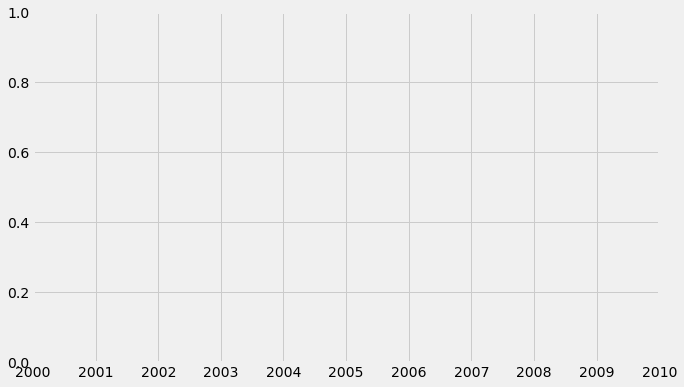

In [111]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

import matplotlib as mpl
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
x_labels=["Rural","Suburban","Urban"]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(faresby_city_date_df,labels=x_labels)

#fig = plt.savefig("PyBer_fare_summary.png")
